<a href="https://colab.research.google.com/github/the-faisalahmed/Optimization/blob/main/Queens_via_LinkedIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://media.istockphoto.com/id/1319503912/vector/golden-crown-icons-set-isolated.jpg?s=612x612&w=0&k=20&c=Uv7qsljZdTWakAZUps0WW7XiriDzbeUpHeDajrYiGTY=)

**Queens via LinkedIn**

The goal is to have exactly one queen in each row, column, and color region.

Two queens cannot touch each other, not even diagonally.

In [38]:
# %%capture
# import sys
# import os

# if 'google.colab' in sys.modules:
#     !pip install idaes-pse --pre
#     !idaes get-extensions --to ./bin
#     os.environ['PATH'] += ':bin'

# !pip install pyomo
from pyomo.environ import *
from pyomo.opt import SolverFactory
from pyomo.util.infeasible import log_infeasible_constraints
from pyomo.opt import SolverStatus
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from pyomo.contrib.latex_printer import latex_printer


In [39]:
n = 9

#####    Creating the groups in the grid   ######

# Purple
groups = {1: []}

for i in range(1,5):
  groups[1].append((i,1))

for i in range(2,10):
  groups[1].append((1,i))

for i in range(2,10):
  groups[1].append((i,9))

for i in range(4,9):
  groups[1].append((9,i))

# Yellow
groups[2] = [(5,1),(6,1),(7,1)]

# Light Blue
groups[3] = [(8,1),(9,1),(9,2),(9,3)]

# Orange
groups[4] = [(2,2),(2,3),(3,2),(4,2),(5,2),(6,2)]

# Coral Pink
groups[5] = []
for i in range(4,9):
  groups[5].append((2,i))

for i in range(2,8):
  groups[5].append((i,8))

for i in range(2,9):
  groups[5].append((8,i))

groups[5].append((7,2))

# Peach

groups[6] = []

for i in range(3,8):
  groups[6].append((i,3))

groups[6].append((3,4))
groups[6].append((7,4))

# Blue

groups[7] = []

for i in range(5,8):
  groups[7].append((3,i))

groups[7].append((4,7))
groups[7].append((5,7))

# Green

groups[8] = []

for i in range(5,8):
  groups[8].append((7,i))

groups[8].append((6,7))

# Grey

groups[9] = []

for i in range(4,7):
  for j in range(4,7):
    groups[9].append((i,j))

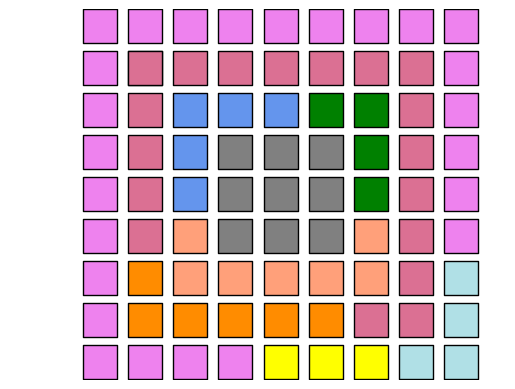

In [40]:
colors = {1: 'violet', 2: 'yellow', 3: 'powderblue', 4: 'darkorange',
          5: 'palevioletred', 6: 'lightsalmon', 7: 'cornflowerblue', 8: 'green', 9: 'gray'}

plt.axis('off')
plt.xlim(-1,n+1)

count = 1
for i in list(groups.values()):
  for j in i:
    plt.scatter(j[0], j[1], marker = 's', c = colors[count], s = 630, edgecolor = 'k')
  count+=1

#plt.savefig('Initial')

In [41]:
model = ConcreteModel()

model.I = RangeSet(1,n)

model.X = Var(model.I, model.I, within = Binary)

# Every group should have exactly one queen
model.con1 = ConstraintList()
for i in list(groups.values()):
  model.con1.add(sum(model.X[j,k] for j in model.I for k in model.I if (j,k) in i) == 1)

# No queens on the same row
def con2_rule(model, i):
  return sum(model.X[i,j] for j in model.I) == 1
model.con2 = Constraint(model.I, rule = con2_rule)

# No queens on the same column
def con3_rule(model, j):
  return sum(model.X[i,j] for i in model.I) == 1
model.con3 = Constraint(model.I, rule = con3_rule)

# Queens shouldn't touch diagonally
def con4_rule(model, i, j):
  if 1 < i < n and 1 < j < n:
    return  model.X[i+1,j-1] + model.X[i+1,j+1] + model.X[i-1,j+1] + model.X[i-1,j-1] <= 2*(1-model.X[i,j])
  else:
    return Constraint.Skip
model.con4 = Constraint(model.I, model.I, rule = con4_rule)

In [42]:
# Solve model
opt = SolverFactory('glpk')
result = opt.solve(model)

if (result.solver.status == SolverStatus.ok) and \
    (result.solver.termination_condition == TerminationCondition.optimal):
    # Do something when the solution in optimal and feasible
    print('Solution is Optimal')
elif (result.solver.termination_condition == TerminationCondition.infeasible):
    # Do something when model in infeasible
    print('Solution is Infeasible')
else:
        # Something else is wrong
    print("Solver Status:",  result.solver.status)

# Solve time
print('Solve Time: ', result.solver.wallclock_time)

Solution is Optimal
Solve Time:  <undefined>


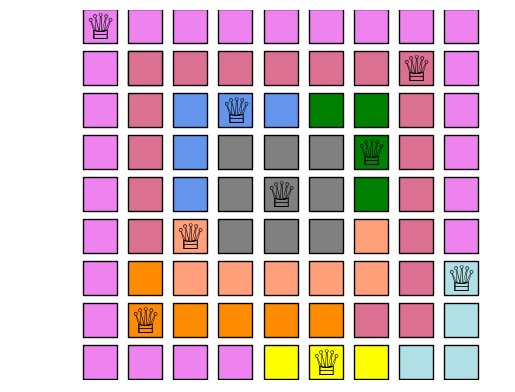

In [43]:
x = model.X.extract_values()

plt.xlim(-1,n+1)
plt.axis('off')
count = 1
for i in list(groups.values()):
  for j in i:
    if x[j] == 1.0:
      plt.scatter(j[0], j[1], marker = 's', c = colors[count], s = 630, edgecolor = 'k')
      plt.text(j[0]-.35, j[1]-.3, s = '\u2655', fontsize = 25, c = 'k', fontweight = 'heavy', zorder = 10)
    else:
      plt.scatter(j[0], j[1], marker = 's', c = colors[count], s = 630, edgecolor = 'k')
  count+=1

#plt.savefig('Complete')